Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 10s 306ms/step - loss: 0.0902 - val_loss: 0.0167
Epoch 2/100
13/13 [==============================] - 3s 232ms/step - loss: 0.0087 - val_loss: 0.0091
Epoch 3/100
13/13 [============================

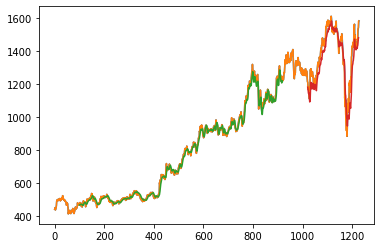

[0.9139055]
101
1 day input [0.94816663 0.9478738  0.94456879 0.93260407 0.92796036 0.939716
 0.97577765 0.93507229 0.93636921 0.93590899 0.93047045 0.92603602
 0.91348555 0.88436843 0.89114567 0.8609409  0.83408293 0.81220327
 0.84642422 0.86491522 0.87269654 0.85249028 0.8541218  0.86847118
 0.88315526 0.88637653 0.89763007 0.88980697 0.88072882 0.91118463
 0.8962495  0.8619449  0.83805724 0.8176418  0.81283079 0.76463703
 0.75417831 0.7765181  0.77388248 0.74999482 0.71640139 0.5851654
 0.6181313  0.5423683  0.57776065 0.50279251 0.49634993 0.46330038
 0.42079615 0.50467508 0.39264125 0.44229929 0.55847473 0.54504569
 0.54454369 0.51513375 0.5848307  0.55696863 0.55445854 0.6620997
 0.65042781 0.67368794 0.64791772 0.61503546 0.63026342 0.67707661
 0.69364326 0.6882465  0.79387957 0.7999875  0.83855924 0.84922714
 0.84788844 0.84688434 0.86803608 0.84250843 0.86360165 0.86368529
 0.90198096 0.9474387  0.95987202 0.87902192 0.90503482 0.85441462
 0.87403524 0.85843081 0.83178201 0.85

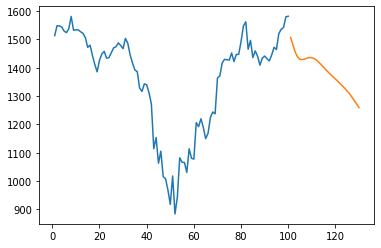

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

df = pd.read_csv('Reliance_Stock.csv')
df = df.dropna()
df.head()

df_close = df['Close']

df_close.shape

plt.plot(df_close)

scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))


df_close.shape


df_close
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

math.sqrt(mean_squared_error(y_train, train_predict))

math.sqrt(mean_squared_error(y_test, test_predict))

look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict


testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


len(test_data), x_test.shape

x_input = test_data[207:].reshape(1,-1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


day_new = np.arange(1,101)
day_pred = np.arange(101,131)

df3 = df_close.tolist()
df3.extend(lst_output)

len(df_close)


plt.plot(day_new, scaler.inverse_transform(df_close[1128:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

